# Udemy - Machine Learning Practical 6 Real-World Applications
### Directing Customers to Subscription Through App Behavior Analysis

#### Importing libraries and reading dataset

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from dateutil import parser

In [25]:
dataset = pd.read_csv('data/appdata10.csv')

In [26]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [27]:
dataset.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


#### Data Cleaning

In [28]:
dataset.hour

0         02:00:00
1         01:00:00
2         19:00:00
3         16:00:00
4         18:00:00
5         09:00:00
6         02:00:00
7         03:00:00
8         14:00:00
9         18:00:00
10        04:00:00
11        11:00:00
12        06:00:00
13        19:00:00
14        04:00:00
15        18:00:00
16        16:00:00
17        21:00:00
18        05:00:00
19        17:00:00
20        09:00:00
21        04:00:00
22        17:00:00
23        02:00:00
24        20:00:00
25        18:00:00
26        16:00:00
27        01:00:00
28        11:00:00
29        17:00:00
           ...    
49970     15:00:00
49971     11:00:00
49972     15:00:00
49973     18:00:00
49974     20:00:00
49975     18:00:00
49976     20:00:00
49977     15:00:00
49978     17:00:00
49979     14:00:00
49980     07:00:00
49981     04:00:00
49982     02:00:00
49983     13:00:00
49984     16:00:00
49985     23:00:00
49986     18:00:00
49987     19:00:00
49988     02:00:00
49989     17:00:00
49990     17:00:00
49991     22

In [31]:
dataset['hour'] = dataset.hour.str.slice(1,3).astype(int)
# run this only one time! :)

In [32]:
dataset

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1
5,56480,2013-04-03 09:58:15.752,2,9,20,"idscreen,Cycle,Home,ScanPreview,VerifyPhone,Ve...",14,0,0,1,2013-04-03 09:59:03.291,0
6,144649,2012-12-25 02:33:18.461,1,2,35,"product_review,product_review2,ScanPreview",3,0,0,0,NaN,0
7,249366,2012-12-11 03:07:49.875,1,3,26,"Splash,Cycle,Home,Credit3Container,Credit3Dash...",41,0,1,0,NaN,0
8,372004,2013-03-20 14:22:01.569,2,14,29,"product_review,product_review2,ScanPreview,Ver...",33,1,1,1,2013-04-27 22:24:54.542,0
9,338013,2013-04-26 18:22:16.013,4,18,26,"Home,Loan2,product_review,product_review,produ...",19,0,0,1,2013-04-26 18:31:58.923,0


#### Plotting

In [33]:
dataset2 = dataset.copy().drop(columns = ['user', 'screen_list', 'enrolled_date' , 'first_open', 'enrolled'])

In [34]:
dataset2

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1
5,2,9,20,14,0,0,0
6,1,2,35,3,0,0,0
7,1,3,26,41,0,1,0
8,2,14,29,33,1,1,0
9,4,18,26,19,0,0,0


#### Histograms

In [35]:
plt.suptitle('Histogram of numerical Columns', fontsize= 20)

Text(0.5, 0.98, 'Histogram of numerical Columns')

<Figure size 432x288 with 0 Axes>

In [36]:
#from matplotlib.pyplot import figure

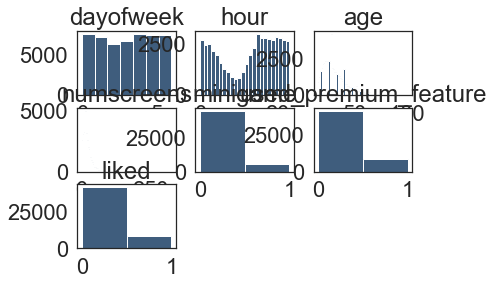

In [37]:
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(3,3,i)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i-1])
    
    vals = np.size(dataset2.iloc[:,i-1].unique())
    plt.hist(dataset2.iloc[:,i-1], bins = vals, color = '#3F5D7D')

#### Correlation with Response

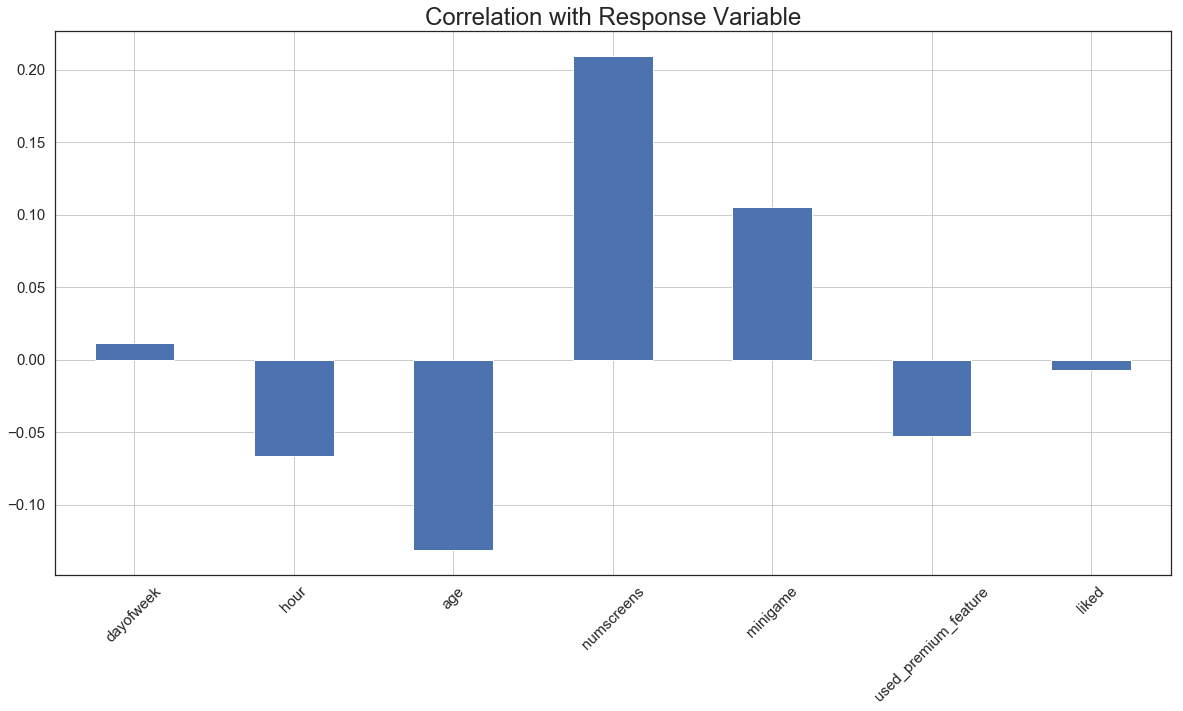

In [38]:
dataset2.corrwith(dataset.enrolled).plot.bar(
    figsize = (20,10), title = 'Correlation with Response Variable',
    fontsize = 15, rot = 45, grid = True
)

#### Correlation Matrix

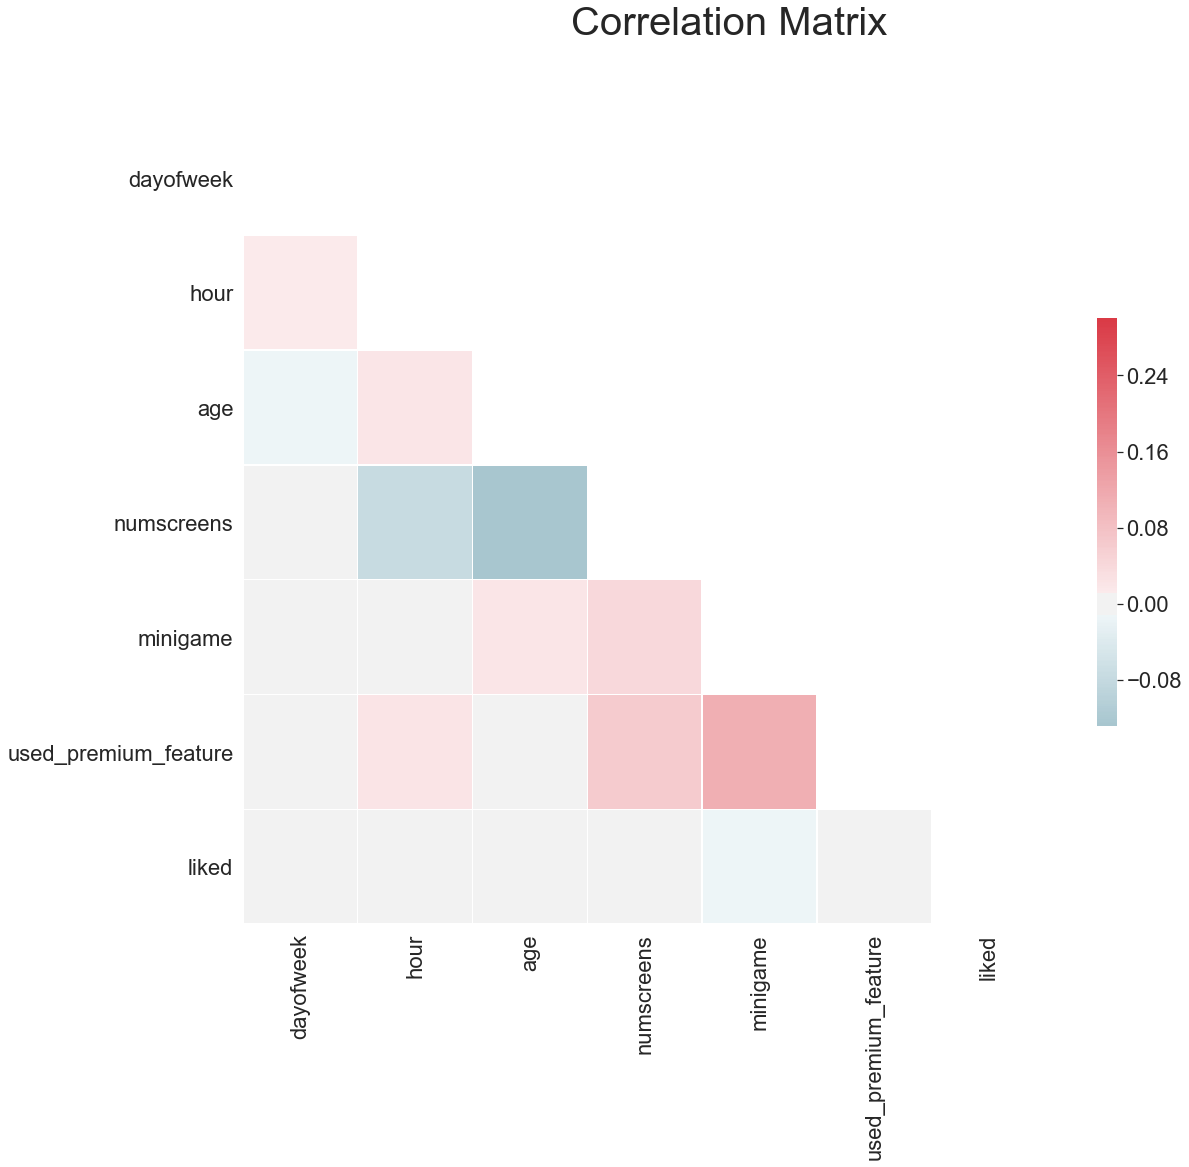

In [39]:
sn.set(style='white',font_scale=2)
corr = dataset2.corr()

mask = np.zeros_like(corr,dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(18,15))
f.suptitle("Correlation Matrix", fontsize = 40)

cmap = sn.diverging_palette(220,10,as_cmap=True)

sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5,cbar_kws={"shrink": .5})

#### Feature Engineering

In [40]:
dataset.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int64
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [41]:
dataset["first_open"] = [parser.parse(row_data) for row_data in dataset["first_open"]]

In [42]:
dataset["enrolled_date"] = [parser.parse(row_data) if isinstance(row_data,str) else row_data for row_data in dataset["enrolled_date"]]

In [43]:
dataset.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int64
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [44]:
dataset["difference"] = (dataset.enrolled_date - dataset.first_open).astype('timedelta64[h]')

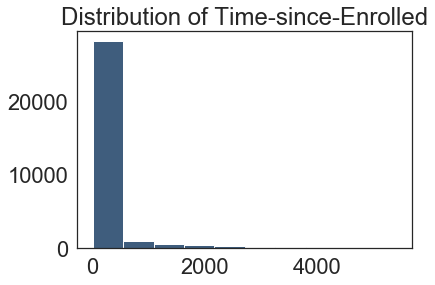

In [45]:
plt.hist(dataset["difference"].dropna(), color = '#3F5D7D')
plt.title('Distribution of Time-since-Enrolled')
plt.show()

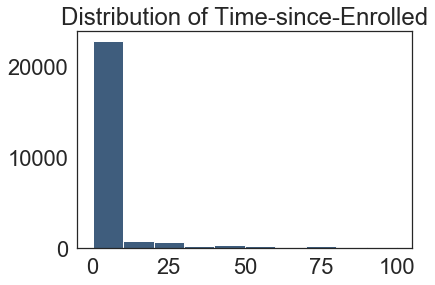

In [46]:
plt.hist(dataset["difference"].dropna(), color = '#3F5D7D', range = [0,100])
plt.title('Distribution of Time-since-Enrolled')
plt.show()

In [47]:
dataset.loc[dataset.difference > 48, 'enrolled'] = 0

In [48]:
dataset = dataset.drop(columns = ['difference', 'enrolled_date', 'first_open'])

#### Formatting the screen_list Field

In [51]:
top_screens = pd.read_csv('data/top_screens.csv').top_screens.values

In [55]:
dataset['screen_list'] = dataset.screen_list.astype(str) + ','

In [56]:
dataset['screen_list']

0        idscreen,joinscreen,Cycle,product_review,ScanP...
1        joinscreen,product_review,product_review2,Scan...
2                                       Splash,Cycle,Loan,
3        product_review,Home,product_review,Loan3,Finan...
4        idscreen,joinscreen,Cycle,Credit3Container,Sca...
5        idscreen,Cycle,Home,ScanPreview,VerifyPhone,Ve...
6              product_review,product_review2,ScanPreview,
7        Splash,Cycle,Home,Credit3Container,Credit3Dash...
8        product_review,product_review2,ScanPreview,Ver...
9        Home,Loan2,product_review,product_review,produ...
10       Splash,idscreen,Home,RewardsContainer,Settings...
11       product_review,Home,Loan2,Credit3Container,Ver...
12       idscreen,joinscreen,Cycle,product_review,produ...
13               Alerts,ProfilePage,Home,Credit3Container,
14       joinscreen,product_review,product_review2,Scan...
15       idscreen,joinscreen,Cycle,Loan2,product_review...
16       product_review,product_review,product_review,p.

In [57]:
for sc in top_screens:
    dataset[sc] = dataset.screen_list.str.contains(sc).astype(int)
    dataset['screen_list'] = dataset.screen_list.str.replace(sc+',','')

In [58]:
dataset["Other"] = dataset.screen_list.str.count(",")

In [59]:
dataset = dataset.drop(columns = ["screen_list"])

#### Funnels

In [62]:
saving_screens = ["Saving1", "Saving2","Saving2Amount",
                  "Saving4", "Saving5","Saving6", "Saving7",
                  "Saving8", "Saving9", "Saving10"]

In [64]:
dataset["SavingsCount"] = dataset[saving_screens].sum(axis = 1)
dataset = dataset.drop(columns = saving_screens)

In [65]:
cm_screens = ["Credit1", "Credit2", "Credit3", "Credit3Container", "Credit3Dashboard"]
dataset["CMCount"] = dataset[cm_screens].sum(axis=1)
dataset = dataset.drop(columns=cm_screens)

In [66]:
cc_screens = ["CC1", "CC1Category", "CC3"]
dataset["CCCount"] = dataset[cc_screens].sum(axis=1)
dataset = dataset.drop(columns=cc_screens)

In [67]:
loan_screens = ["Loan","Loan2","Loan3","Loan4"]
dataset["LoansCount"] = dataset[loan_screens].sum(axis=1)
dataset = dataset.drop(columns=loan_screens)

In [69]:
dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingsCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1


In [70]:
dataset.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingsCount,CMCount,CCCount,LoansCount
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.497000,0.165000,0.517760,...,0.014220,0.013340,0.013400,0.008200,0.007580,6.214260,0.365020,0.92776,0.176860,0.788400
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.499996,0.371184,0.499689,...,0.118398,0.114727,0.114981,0.090183,0.086733,3.672561,1.405511,1.21751,0.612787,0.677462
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.00000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.00000,0.000000,1.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.00000,0.000000,1.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,10.000000,5.00000,3.000000,3.000000


In [71]:
dataset.to_csv("data/new_appdata10.csv", index = False)

#### Building the model

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import time

In [107]:
dataset = pd.read_csv("data/new_appdata10.csv")

#### data Preprocessing

In [108]:
response = dataset["enrolled"]

In [109]:
dataset = dataset.drop(columns="enrolled")

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
X_train, X_test, y_train, y_test = train_test_split(dataset,response,test_size=0.2, random_state = 0)

In [112]:
train_identifier = X_train['user']
X_train = X_train.drop(columns = 'user')
test_identifier = X_test['user']
X_test = X_test.drop(columns = 'user')

In [113]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

In [114]:
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))

In [115]:
X_test2 = pd.DataFrame(sc_X.transform(X_test))

In [116]:
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values

In [117]:
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

In [118]:
X_train= X_train2
X_test = X_test2

#### Model building

In [119]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, penalty = 'l1')

In [120]:
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [121]:
y_pred = classifier.predict(X_test)

In [122]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [123]:
cm = confusion_matrix(y_test, y_pred)

In [124]:
accuracy_score(y_test, y_pred)

0.7681

In [125]:
precision_score(y_test, y_pred)

0.7618952017667135

In [126]:
recall_score(y_test, y_pred)

0.7700892857142857

In [127]:
f1_score(y_test, y_pred)

0.7659703300030276

Test Data Accuracy: 0.7681


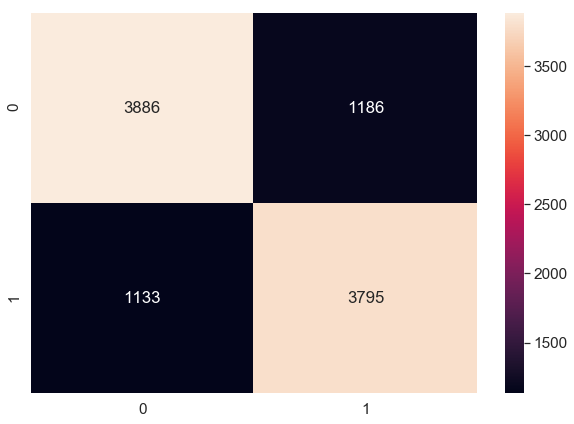

In [128]:
df_cm = pd.DataFrame(cm, index = (0,1), columns = (0,1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [129]:
from sklearn.model_selection import cross_val_score

In [130]:
accuracies = cross_val_score(estimator=classifier, X=X_train, y = y_train, cv = 10)

In [132]:
print("Logistic Accuracy: %0.3f (+/- %-.3f)" % (accuracies.mean(),accuracies.std()*2))

Logistic Accuracy: 0.767 (+/- 0.009)


#### Formatting the final Results

In [134]:
final_results = pd.concat([y_test,test_identifier], axis = 1).dropna()

In [135]:
final_results['predicted_results'] = y_pred
final_results[['user','enrolled', 'predicted_results']].reset_index(drop=True)

,user,enrolled,predicted_results
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,1
5,65042,1,0
6,207226,1,1
7,363062,0,0
8,152296,1,1
9,64484,0,0
